# 1. SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [8]:
data = pd.read_csv("svm_data.csv")
x = data[['x1','x2']].values
y = data['label'].values

(-0.1, 4.1)

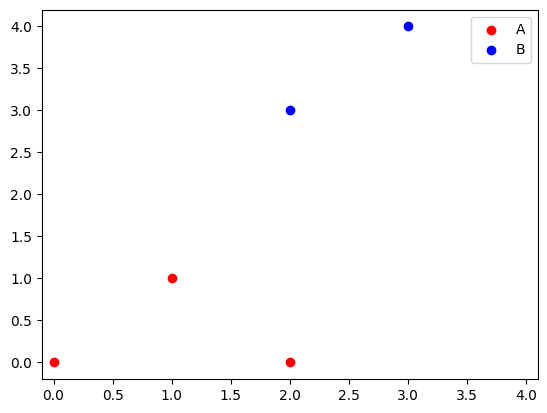

In [11]:
plt.scatter(x[y=='A',0],x[y=='A',1],color='r')
plt.scatter(x[y=='B',0],x[y=='B',1],color='b')
plt.legend(['A','B'])
plt.xlim(-0.1,4.1)

In [12]:
# create support vector classification object
# assume dataset can be separated linearly
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x,y)

SVC(kernel='linear')

In [13]:
# print coefficients, support
print('svm coefficients:')
print(svm_model.intercept_, svm_model.coef_)

svm coefficients:
[-2.2] [[0.4 0.8]]


In [14]:
print('svm support vectors:\n',
x[svm_model.support_,:])

svm support vectors:
 [[1. 1.]
 [2. 3.]]


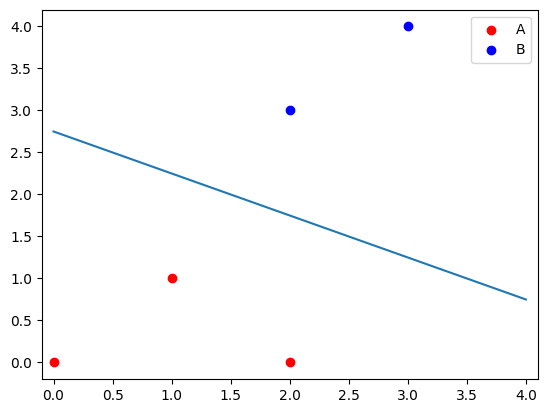

In [ ]:
plt.scatter(x[y=='A',0],x[y=='A',1],color='r')
plt.scatter(x[y=='B',0],x[y=='B',1],color='b')
plt.legend(['A','B'])
plt.xlim(-0.1,4.1)
# plot boundary
x1p = np.linspace(0,4,10)
x2p = (svm_model.coef_[0][0]*
x1p+svm_model.intercept_)/(-svm_model.coef_[0][1])
plt.plot(x1p,x2p)
plt.gca().set_aspect('equal')

In [20]:
# make predictions
print('class of [3,3]:',
svm_model.predict([[3,3]])[0])
print('class of [2,1]:',
svm_model.predict([[2,1]])[0])

class of [3,3]: B
class of [2,1]: A


# 2. Confusion Matrix

In [21]:
data = pd.read_csv("svm_data.csv")
xt = data[['x1','x2']].values
yt = data['label'].values

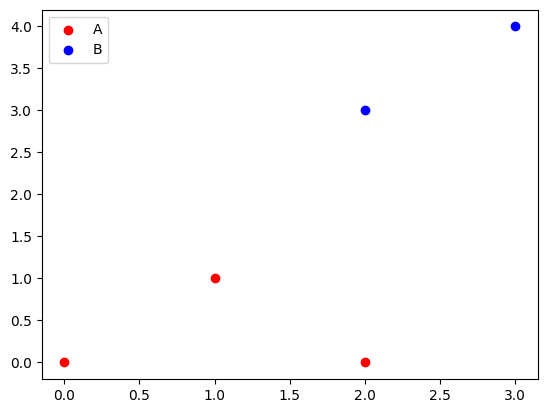

In [22]:
plt.scatter(x[y=='A',0],x[y=='A',1],color='r')
plt.scatter(x[y=='B',0],x[y=='B',1],color='b')
plt.legend(['A','B'])

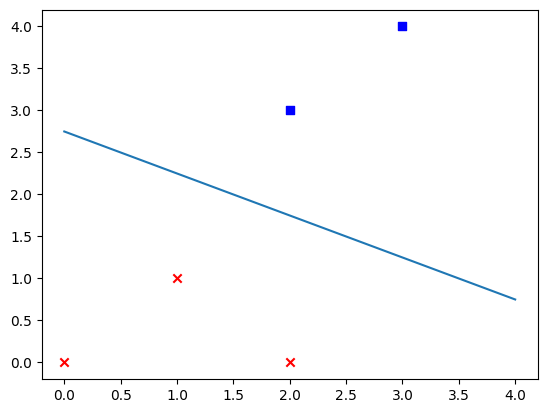

In [28]:
plt.scatter(xt[yt=='A',0],xt[yt=='A',1],color='r',marker='x')
plt.scatter(xt[yt=='B',0],xt[yt=='B',1],color='b',marker='s')
# plot boundary
x1p = np.linspace(0,4,10)
x2p = (svm_model.coef_[0][0]*x1p+svm_model.intercept_)/(-svm_model.coef_[0][1])
plt.plot(x1p,x2p)

In [29]:
# make predictions
preds = svm_model.predict(xt)
print(x,preds)

[[0. 0.]
 [1. 1.]
 [2. 0.]
 [2. 3.]
 [3. 4.]] ['A' 'A' 'A' 'B' 'B']


In [30]:
print(pd.crosstab(preds,yt))

col_0  A  B
row_0      
A      3  0
B      0  2
